# Cálculo de Energia Livre em Catálise usando VASP e ASE

Autor: [Prof. Elvis do A. Soares](https://github.com/elvissoares) 

Contato: [elvis@peq.coppe.ufrj.br](mailto:elvis@peq.coppe.ufrj.br) - [Programa de Engenharia Química, PEQ/COPPE, UFRJ, Brasil](https://www.peq.coppe.ufrj.br/)

---

In [2]:
import os
# Definindo o path para os arquivos de potencial de pseudopotenciais do VASP
# Certifique-se de que o caminho esteja correto para o seu sistema
os.environ['VASP_PP_PATH'] = '/home/elvis/Programs/vasp-6.5.1/pp'
os.environ['ASE_VASP_COMMAND'] = 'mpirun -np 1 vasp_std'
os.environ['NO_STOP_MESSAGE'] = '1' # to avoid warning from mpirun

# Importando o VASP calculator do ASE
from ase.calculators.vasp import Vasp

from ase import Atoms
from ase.io import write, read
from ase.visualize import view

import numpy as np

# Water Gas Shift Reaction

$H_2 O + CO \to CO_2 + H_2$ 

Valores experimentais

$\Delta G_r = -28.6\ \text{kJ/mol}$

$\Delta H_r = -41.2\ \text{kJ/mol}$

In [3]:
h2o = Atoms('H2O',
            positions=[[-0.768, 0.000, 0.595],
                       [0.768, 0.000, 0.595],
                       [0.000, 0.000, 0.000]]) # geometria otimizada com PBE
h2o.center(vacuum=6.0)  
h2o.pbc = True

calc_relax = Vasp(
    directory='h2o_relax',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-6, ediffg=-0.01,
    isif=2, ibrion=2, nsw=100,
    nelm=100,
    lwave=True, lcharg=True, lvtot=True,
    atoms=h2o
)
calc_relax.calculate(h2o) # demora por volta de 10 s

E_h2o = h2o.get_potential_energy()

print(f'Optimized energy of H2O: {E_h2o:.3f} eV')

Optimized energy of H2O: -14.219 eV


In [4]:
calc_vib = Vasp(
    directory='h2o_vib',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=6,           # finite differences with symmetry
    lreal=False,
    lwave=False, lcharg=False,
    atoms=h2o
)

calc_vib.calculate(h2o)

vib_water = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_water.get_frequencies()

print(f'Vibrational frequencies of H2O (cm⁻¹):')
vib_energies_h2o = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energies_h2o.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of H2O (cm⁻¹):
f_v: 1584.770 cm⁻¹, E_v: 0.196 eV
f_v: 3727.986 cm⁻¹, E_v: 0.462 eV
f_v: 3840.037 cm⁻¹, E_v: 0.476 eV


In [7]:
co = Atoms('CO',
            positions=[[0.000, 0.000, 0.000],
                       [0.000, 0.000, 1.144]]) # geometria otimizada com PBE
co.center(vacuum=6.0)  
co.pbc = True

calc_relax = Vasp(
    directory='co_relax',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-6, ediffg=-0.01,
    isif=2, ibrion=2, nsw=100,
    nelm=100,
    lwave=True, lcharg=True, lvtot=True,
    atoms=co
)
calc_relax.calculate(co) # demora por volta de 10 s

E_co = co.get_potential_energy()

print(f'Optimized energy of CO: {E_co:.3f} eV')

Optimized energy of CO: -14.780 eV


In [8]:
calc_vib = Vasp(
    directory='co_vib',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=6,           # finite differences with symmetry
    lreal=False,
    lwave=False, lcharg=False,
    atoms=co
)

calc_vib.calculate(co)

vib_co = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_co.get_frequencies()

print(f'Vibrational frequencies of CO (cm⁻¹):')
vib_energies_co = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energies_co.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of CO (cm⁻¹):
f_v: 2125.767 cm⁻¹, E_v: 0.264 eV


In [10]:
co2 = Atoms('CO2',
            positions=[[0.000, 0.000, 0.000],
                       [0.000, 0.000, 1.177],
                       [0.000, 0.000, -1.177]]) # geometria otimizada com PBE
co2.center(vacuum=6.0)  
co2.pbc = True

calc_relax = Vasp(
    directory='co2_relax',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-6, ediffg=-0.01,
    isif=2, ibrion=2, nsw=100,
    nelm=100,
    lwave=True, lcharg=True, lvtot=True,
    atoms=co2
)
calc_relax.calculate(co2) # demora por volta de 10 s

E_co2 = co2.get_potential_energy()

print(f'Optimized energy of CO2: {E_co2:.3f} eV')

Optimized energy of CO2: -22.960 eV


In [11]:
calc_vib = Vasp(
    directory='co2_vib',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=6,           # finite differences with symmetry
    lreal=False,
    lwave=False, lcharg=False,
    atoms=co2
)

calc_vib.calculate(co2)

vib_co2 = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_co2.get_frequencies()

print(f'Vibrational frequencies of CO2 (cm⁻¹):')
vib_energies_co2 = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energies_co2.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of CO2 (cm⁻¹):
f_v: 631.459 cm⁻¹, E_v: 0.078 eV
f_v: 631.459 cm⁻¹, E_v: 0.078 eV
f_v: 1317.667 cm⁻¹, E_v: 0.163 eV
f_v: 2365.977 cm⁻¹, E_v: 0.293 eV


In [12]:
h2 = Atoms('H2',
            positions=[[0.000, 0.000, 0.000],
                       [0.000, 0.000, 0.740]]) # geometria otimizada com PBE
h2.center(vacuum=6.0)  
h2.pbc = True

calc_relax = Vasp(
    directory='h2_relax',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-6, ediffg=-0.01,
    isif=2, ibrion=2, nsw=100,
    nelm=100,
    lwave=True, lcharg=True, lvtot=True,
    atoms=h2
)
calc_relax.calculate(h2) # demora por volta de 10 s

E_h2 = h2.get_potential_energy()

print(f'Optimized energy of H2: {E_h2:.3f} eV')

Optimized energy of H2: -6.766 eV


In [ ]:
calc_vib = Vasp(
    directory='h2_vib',
    xc='PBE',
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=6,           # finite differences with symmetry
    lreal=False,
    lwave=False, lcharg=False,
    atoms=h2
)

calc_vib.calculate(h2)

vib_h2 = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_h2.get_frequencies()

print(f'Vibrational frequencies of H2 (cm⁻¹):')
vib_energies_h2 = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energies_h2.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of H2 (cm⁻¹):
f_v: 4320.547 cm⁻¹, E_v: 0.536 eV


Calculando energia livre de Gibbs e Entalpia

In [19]:
from ase.thermochemistry import IdealGasThermo

h2o_thermo = IdealGasThermo(vib_energies=vib_energies_h2o,
                        potentialenergy=E_h2o, atoms=h2o,
                        geometry='nonlinear', symmetrynumber=2, spin=0)

co_thermo = IdealGasThermo(vib_energies=vib_energies_co,
                        potentialenergy=E_co, atoms=co,
                        geometry='linear', symmetrynumber=1, spin=0)

h2_thermo = IdealGasThermo(vib_energies=vib_energies_h2,
                        potentialenergy=E_h2, atoms=h2,
                        geometry='linear', symmetrynumber=2, spin=0)

co2_thermo = IdealGasThermo(vib_energies=vib_energies_co2,
                        potentialenergy=E_co2, atoms=co2,
                        geometry='linear', symmetrynumber=2, spin=0)


P = 101325. # Pa
T = 298.15 # K

G_h2o = h2o_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_h2o = h2o_thermo.get_enthalpy(temperature=T, verbose=False)

G_co = co_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_co = co_thermo.get_enthalpy(temperature=T, verbose=False)

G_h2 = h2_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_h2 = h2_thermo.get_enthalpy(temperature=T, verbose=False)

G_co2 = co2_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_co2 = co2_thermo.get_enthalpy(temperature=T, verbose=False)

# Cálculo da variação de energia livre de Gibbs e entalpia para a reação WGS
# CO + H2O -> CO2 + H2
Gwgs = G_co2 + G_h2 - (G_co + G_h2o)
Hwgs = H_co2 + H_h2 - (H_co + H_h2o)

print('Water-gas shift reaction: CO + H2O -> CO2 + H2')
print(f'at T={T} K and P={P} Pa:')
print(f'ΔG = {Gwgs:.3f} eV = {Gwgs*96.485:.3f} kJ/mol')
print(f'ΔH = {Hwgs:.3f} eV = {Hwgs*96.485:.3f} kJ/mol')


Water-gas shift reaction: CO + H2O -> CO2 + H2
at T=298.15 K and P=101325.0 Pa:
ΔG = -0.727 eV = -70.151 kJ/mol
ΔH = -0.857 eV = -82.648 kJ/mol


# Reação de WGS com Catalisador de Pt(111)

Reações de Adsorção

$ H_2 O + ^* \rightleftarrows H_2 O^*$ (1)

$ CO + * \to CO*$ (2) 

$ CO2 + * \to CO2*$ (3) 

$ H2 + * \to 2 H*$ (4) 


**Ref:** 
- Grabow, L. C., Gokhale, A. A., Evans, S. T., Dumesic, J. A., & Mavrikakis, M. (2008). _Mechanism of the water gas shift reaction on Pt: First principles, experiments, and microkinetic modeling._ The Journal of Physical Chemistry C, 112(12), 4608-4617. https://pubs.acs.org/doi/pdf/10.1021/jp7099702
- Gokhale, A. A., Dumesic, J. A., & Mavrikakis, M. (2008). _On the mechanism of low-temperature water gas shift reaction on copper._ Journal of the American Chemical Society, 130(4), 1402-1414. https://pubs.acs.org/doi/pdf/10.1021/ja0768237

## Equilibrando Geometria do Catalisador

Cristal bulk de Pt

In [21]:
from ase.lattice.cubic import FaceCenteredCubic

# bulk system
Pt_crystal = FaceCenteredCubic(size=(1, 1, 1), symbol='Pt', latticeconstant=3.967, pbc=True)

calc_relax = Vasp(directory='Pt_relax',
                xc='PBE',
                kpts=[6, 6, 6],  # specifies k-points
                encut=450,
                ismear=0, sigma=0.05,
                ediff=1e-6, ediffg=-0.01,
                isif=7, ibrion=2, nsw=100, # ionic relaxation (ISIF=7: relax cell volume only)
                atoms=Pt_crystal
                )
calc_relax.calculate(Pt_crystal) # demora por volta de 2 s

E_Pt = Pt_crystal.get_potential_energy()

a0_Pt = Pt_crystal.cell.cellpar()[0]

print(f'Optimized energy of Pt: {E_Pt:.3f} eV')
print(f"Lattice length: {a0_Pt:.3f} Å")

Optimized energy of Pt: -24.458 eV
Lattice length: 3.967 Å


Superfície Pt111

In [ ]:
from ase.build import fcc111

# Superfície Pt111
Pt111_slab = fcc111("Pt", size=(2,2,3), a=a0_Pt)
Pt111_slab.center(vacuum=5.0, axis=2)
Pt111_slab.pbc = True

calc_relax = Vasp(directory='Pt111_slab_relax',
                xc='PBE',
                kpts=[6, 6, 1],  # specifies k-points
                encut=450,
                ismear=0, sigma=0.05,
                ediff=1e-6, ediffg=-0.01,
                ibrion=-1, # just SCF (no ionic relaxation)
                atoms=Pt111_slab
                )
calc_relax.calculate(Pt111_slab) # demora por volta de 12 s

E_Pt111 = Pt111_slab.get_potential_energy()

print(f'Optimized energy of Pt111: {E_Pt111:.3f} eV')

Optimized energy of Pt111: -67.924 eV


## Reação 1: Water Adsorption

$ H_2 O + * \to H_2 O*$ 

Calculando equilíbrio da geometria da molécula $H_2 O$ adsorvida na superfície Pt111

In [ ]:
from ase.constraints import FixAtoms
from ase.build import add_adsorbate
# Adsorvendo a molécula de H2O na superfície Pt111

H2Oads_slab = fcc111("Pt", size=(2,2,3), a=a0_Pt)
H2Oads_slab.center(vacuum=5.0, axis=2)
H2Oads_slab.pbc = True

h2o = Atoms('H2O',
            positions=[[-0.768, 0.595, 0.000],
                       [0.768, 0.595, 0.000],
                       [0.000, 0.000, 0.000]]) # geometria otimizada com PBE

h2o.rotate('z', 104.46/2) # rotaciona a molécula em 60 graus em torno do eixo z

add_adsorbate(H2Oads_slab,  adsorbate=h2o, height=2.45, position = (4.50, 2.18), mol_index=2 )

# fixando os átomos de Pt
constraint = FixAtoms(mask=[atom.symbol=='Pt' for atom in H2Oads_slab])
H2Oads_slab.set_constraint([constraint])

calc_relax = Vasp(directory='Pt111_H2O_relax',
                xc='PBE',
                kpts=[6, 6, 1],  # specifies k-points
                encut=450,
                ismear=0, sigma=0.05,
                ediff=1e-6, ediffg=-0.01,
                isif=0, ibrion=2, nsw=100, # ionic relaxation (ISIF=2: relax atoms position only)
                atoms=H2Oads_slab
                )
calc_relax.calculate(H2Oads_slab) # demora por volta de 260 min

E_Pt111_H2O= H2Oads_slab.get_potential_energy()

print(f'Optimized energy of H2O in top position of Pt111: {E_Pt111_H2O:.3f} eV')


Optimized energy of H2O in top position of Pt111: -82.353 eV


In [24]:
E_ads_Pt111_H2O = E_Pt111_H2O - E_Pt111 - E_h2o

print(f'Adsorption energy of H2O on Pt111: {E_ads_Pt111_H2O:.3f} eV')

Adsorption energy of H2O on Pt111: -0.210 eV


In [25]:
calc_vib = Vasp(
    directory='Pt111_H2O_vib',
    xc='PBE',
    kpts=[6, 6, 1],
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=5,nfree=2, nsw=1,           # finite differences with selective dynamics (Pt atoms fixed)
    lreal=False,lwave=False, lcharg=False,
    atoms=H2Oads_slab
)

calc_vib.calculate(H2Oads_slab)

vib_Pt111_h2o = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_Pt111_h2o.get_frequencies()

print(f'Vibrational frequencies of H2O on Pt111 (cm⁻¹):')

vib_energie_Pt111_h2o = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energie_Pt111_h2o.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of H2O on Pt111 (cm⁻¹):
f_v: 514.212 cm⁻¹, E_v: 0.064 eV
f_v: 569.373 cm⁻¹, E_v: 0.071 eV
f_v: 1549.063 cm⁻¹, E_v: 0.192 eV
f_v: 3559.200 cm⁻¹, E_v: 0.441 eV
f_v: 3656.129 cm⁻¹, E_v: 0.453 eV


In [26]:
h2o_Pt111_thermo = IdealGasThermo(vib_energies=vib_energie_Pt111_h2o,
                        potentialenergy=E_Pt111_H2O, atoms=H2Oads_slab,
                        geometry='nonlinear', symmetrynumber=2, spin=0)

G_h2o_Pt111 = h2o_Pt111_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_h2o_Pt111 = h2o_Pt111_thermo.get_enthalpy(temperature=T, verbose=False)

In [29]:
Hads_h2o = H_h2o_Pt111 - H_h2o - E_Pt111
      
print(f'ΔH h2o adsorption = {Hads_h2o:.3f} eV')

ΔH h2o adsorption = -0.156 eV


## Reação 2: CO Adsorption

$ CO + * \to CO*$ 

In [ ]:
# Adsorvendo a molécula de H2O na superfície Pt111

COads_slab = fcc111("Pt", size=(2,2,3), a=a0_Pt)
COads_slab.center(vacuum=5.0, axis=2)
COads_slab.pbc = True

co = Atoms('CO',
            positions=[[0.000, 0.000, 0.000],
                       [0.000, 0.000, 1.20]]) # geometria otimizada com PBE

add_adsorbate(COads_slab,  adsorbate=co, height=2.13, position ='hcp', mol_index=0 )

# fixando os átomos de Pt
constraint = FixAtoms(mask=[atom.symbol=='Pt' for atom in COads_slab])
COads_slab.set_constraint([constraint])

calc_relax = Vasp(directory='Pt111_CO_relax',
                xc='PBE',
                kpts=[6, 6, 1],  # specifies k-points
                encut=450,
                ismear=0, sigma=0.05,
                ediff=1e-6, ediffg=-0.01,
                isif=0, ibrion=2, nsw=100, # ionic relaxation (ISIF=2: relax atoms position only)
                atoms=COads_slab
                )
calc_relax.calculate(COads_slab) # demora por volta de 14 min

E_Pt111_CO= COads_slab.get_potential_energy()

print(f'Optimized energy of CO in top position of Pt111: {E_Pt111_CO:.3f} eV')


Optimized energy of CO in top position of Pt111: -84.457 eV


In [31]:
E_ads_Pt111_CO = E_Pt111_CO - E_Pt111 - E_co

print(f'Adsorption energy of CO on Pt111: {E_ads_Pt111_CO:.3f} eV')

Adsorption energy of CO on Pt111: -1.753 eV


In [32]:
calc_vib = Vasp(
    directory='Pt111_CO_vib',
    xc='PBE',
    kpts=[6, 6, 1],
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=5,nfree=2, nsw=1,           # finite differences with selective dynamics (Pt atoms fixed)
    lreal=False,lwave=False, lcharg=False,
    atoms=COads_slab
)

calc_vib.calculate(COads_slab)

vib_Pt111_co = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_Pt111_co.get_frequencies()

print(f'Vibrational frequencies of CO on Pt111 (cm⁻¹):')

vib_energie_Pt111_co = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energie_Pt111_co.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of CO on Pt111 (cm⁻¹):
f_v: 291.556 cm⁻¹, E_v: 0.036 eV
f_v: 291.620 cm⁻¹, E_v: 0.036 eV
f_v: 337.151 cm⁻¹, E_v: 0.042 eV
f_v: 1777.169 cm⁻¹, E_v: 0.220 eV


In [45]:
co_Pt111_thermo = IdealGasThermo(vib_energies=vib_energie_Pt111_co,
                        potentialenergy=E_Pt111_CO, atoms=COads_slab,
                        geometry='nonlinear', symmetrynumber=2, spin=0)

G_co_Pt111 = co_Pt111_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_co_Pt111 = co_Pt111_thermo.get_enthalpy(temperature=T, verbose=False)

In [46]:
Hads_co = H_co_Pt111 - H_co - E_Pt111
      
print(f'ΔH co adsorption = {Hads_co:.3f} eV')

ΔH co adsorption = -1.671 eV


## Reação 3: CO2 Adsorption

$ CO2 + * \to CO2*$ 

In [38]:
# Adsorvendo a molécula de CO2 na superfície Pt111

CO2ads_slab = fcc111("Pt", size=(2,2,3), a=a0_Pt)
CO2ads_slab.center(vacuum=5.0, axis=2)
CO2ads_slab.pbc = True

co2 = Atoms('CO2',
            positions=[[0.000, 0.000, 0.000],
                       [1.177, 0.000, 0.000],
                       [-1.177, 0.000, 0.000]]) # geometria otimizada com PBE

add_adsorbate(CO2ads_slab,  adsorbate=co2, height=2.5, position ='ontop', mol_index=0 )

# fixando os átomos de Pt
constraint = FixAtoms(mask=[atom.symbol=='Pt' for atom in CO2ads_slab])
CO2ads_slab.set_constraint([constraint])

calc_relax = Vasp(directory='Pt111_CO2_relax',
                xc='PBE',
                kpts=[6, 6, 1],  # specifies k-points
                encut=450,
                ismear=0, sigma=0.05,
                ediff=1e-6, ediffg=-0.01,
                isif=0, ibrion=2, nsw=100, # ionic relaxation (ISIF=2: relax atoms position only)
                atoms=CO2ads_slab
                )
calc_relax.calculate(CO2ads_slab) # demora por volta de 29 min

E_Pt111_CO2= CO2ads_slab.get_potential_energy()

print(f'Optimized energy of CO2 in top position of Pt111: {E_Pt111_CO2:.3f} eV')


Optimized energy of CO2 in top position of Pt111: -90.896 eV


In [39]:
E_ads_Pt111_CO2 = E_Pt111_CO2 - E_Pt111 - E_co2

print(f'Adsorption energy of CO2 on Pt111: {E_ads_Pt111_CO2:.3f} eV')

Adsorption energy of CO2 on Pt111: -0.012 eV


In [40]:
calc_vib = Vasp(
    directory='Pt111_CO2_vib',
    xc='PBE',
    kpts=[6, 6, 1],
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=5,nfree=2, nsw=1,           # finite differences with selective dynamics (Pt atoms fixed)
    lreal=False,lwave=False, lcharg=False,
    atoms=CO2ads_slab
)

calc_vib.calculate(CO2ads_slab)

vib_Pt111_co2 = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_Pt111_co2.get_frequencies()

print(f'Vibrational frequencies of CO2 on Pt111 (cm⁻¹):')

vib_energie_Pt111_co2 = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energie_Pt111_co2.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of CO2 on Pt111 (cm⁻¹):
f_v: 628.211 cm⁻¹, E_v: 0.078 eV
f_v: 629.188 cm⁻¹, E_v: 0.078 eV
f_v: 1317.823 cm⁻¹, E_v: 0.163 eV
f_v: 2347.994 cm⁻¹, E_v: 0.291 eV


In [41]:
co2_Pt111_thermo = IdealGasThermo(vib_energies=vib_energie_Pt111_co2,
                        potentialenergy=E_Pt111_CO2, atoms=CO2ads_slab,
                        geometry='nonlinear', symmetrynumber=2, spin=0)

G_co2_Pt111 = co2_Pt111_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_co2_Pt111 = co2_Pt111_thermo.get_enthalpy(temperature=T, verbose=False)

In [42]:
Hads_co2 = H_co2_Pt111 - H_co2 - E_Pt111
      
print(f'ΔH CO2 adsorption = {Hads_co2:.3f} eV')

ΔH CO2 adsorption = -0.001 eV


## Reação 4: H2 Adsorption

$ H2 + * \to 2 H*$ 

In [53]:
from ase import Atom
# Adsorvendo átomo de H na superfície Pt111

H2ads_slab = fcc111("Pt", size=(2,2,3), a=a0_Pt)
H2ads_slab.center(vacuum=5.0, axis=2)
H2ads_slab.pbc = True

h = Atom('H', position=[0.000, 0.000, 0.000], magmom=1.0)

add_adsorbate(H2ads_slab,  adsorbate=h, height=0.94, position ='fcc')

# fixando os átomos de Pt
constraint = FixAtoms(mask=[atom.symbol=='Pt' for atom in H2ads_slab])
H2ads_slab.set_constraint([constraint])

calc_relax = Vasp(directory='Pt111_H_relax',
                xc='PBE',
                kpts=[6, 6, 1],  # specifies k-points
                encut=450,
                ismear=0, sigma=0.05,
                ediff=1e-6, ediffg=-0.01,
                isif=0, ibrion=2, nsw=100, # ionic relaxation (ISIF=2: relax atoms position only)
                atoms=H2ads_slab
                )
calc_relax.calculate(H2ads_slab) # demora por volta de 29 min

E_Pt111_H = H2ads_slab.get_potential_energy()

print(f'Optimized energy of H in fcc position of Pt111: {E_Pt111_H:.3f} eV')


Optimized energy of H in fcc position of Pt111: -71.760 eV


/home/elvis/Programs/miniforge3/envs/quantum/lib/python3.13/site-packages/ase/calculators/vasp/vasp.py:1004: UserWarning: Magnetic moment data not written in OUTCAR (LORBIT<10), setting magnetic_moments to zero.
Set LORBIT>=10 to get information on magnetic moments
  warn('Magnetic moment data not written in OUTCAR (LORBIT<10),'


In [54]:
E_ads_Pt111_H2 = 2*(E_Pt111_H - E_Pt111) - E_h2

print(f'Adsorption energy of H2 on Pt111: {E_ads_Pt111_H2:.3f} eV')

Adsorption energy of H2 on Pt111: -0.905 eV


In [55]:
calc_vib = Vasp(
    directory='Pt111_H_vib',
    xc='PBE',
    kpts=[6, 6, 1],
    encut=450,
    ismear=0, sigma=0.05,
    ediff=1e-8,
    ibrion=5,nfree=2, nsw=1,           # finite differences with selective dynamics (Pt atoms fixed)
    lreal=False,lwave=False, lcharg=False,
    atoms=H2ads_slab
)

calc_vib.calculate(H2ads_slab)

vib_Pt111_h = calc_vib.get_vibrations()

# Frequencies (cm⁻¹)
freqs = vib_Pt111_h.get_frequencies()

print(f'Vibrational frequencies of H on Pt111 (cm⁻¹):')

vib_energie_Pt111_h = []
for freq in freqs:
    if freq.real > 200:
        vib_energy = (freq.real * 1.23981e-4)  # Convert cm⁻¹ to eV
        vib_energie_Pt111_h.append(vib_energy)
        print(f'f_v: {freq.real:.3f} cm⁻¹, E_v: {vib_energy:.3f} eV')

Vibrational frequencies of H on Pt111 (cm⁻¹):
f_v: 517.673 cm⁻¹, E_v: 0.064 eV
f_v: 517.725 cm⁻¹, E_v: 0.064 eV
f_v: 1112.736 cm⁻¹, E_v: 0.138 eV


In [56]:
h_Pt111_thermo = IdealGasThermo(vib_energies=vib_energie_Pt111_h,
                        potentialenergy=E_Pt111_H, atoms=H2ads_slab,
                        geometry='nonlinear', symmetrynumber=2, spin=0)

G_h_Pt111 = h_Pt111_thermo.get_gibbs_energy(temperature=T, pressure=P, verbose=False)
H_h_Pt111 = h_Pt111_thermo.get_enthalpy(temperature=T, verbose=False)

In [58]:
Hads_h2 = 2*(H_h_Pt111- E_Pt111) - H_h2 

print(f'ΔH H2 adsorption = {Hads_h2:.3f} eV')

ΔH H2 adsorption = -0.767 eV


## Resultado Final


| Reação                                 | $\Delta E$ (eV)  | $\Delta H$ (eV) |
|----------------------------------------|----------|------------|
| $ H_2 O + ^* \rightleftarrows H_2 O^*$ |  -0.210  | -0.156     |
| $ CO + * \rightleftarrows CO*$         |  -1.753  | -1.671     |
| $ CO2 + * \rightleftarrows CO2*$       |  -0.012  | -0.001     |
| $ H2 + * \rightleftarrows 2 H*$        |  -0.905  | -0.767     |


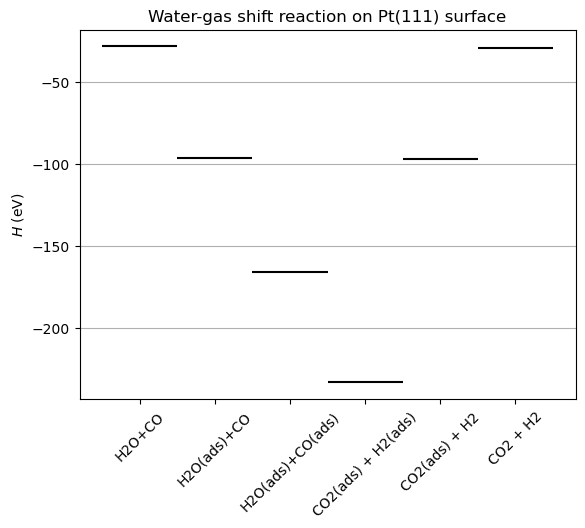

In [88]:
from matplotlib import pyplot as plt

plt.hlines(H_h2o+H_co, xmin=0, xmax=1, colors='black')
plt.hlines(H_h2o_Pt111+H_co, xmin=1, xmax=2, colors='black')
plt.hlines(H_h2o_Pt111+H_co_Pt111, xmin=2, xmax=3, colors='black')
plt.hlines(H_co2_Pt111+2*H_h_Pt111, xmin=3, xmax=4, colors='black')
plt.hlines(H_co2_Pt111+H_h2, xmin=4, xmax=5, colors='black')
plt.hlines(H_co2+H_h2, xmin=5, xmax=6, colors='black')

plt.ylabel(r'$H$ (eV)')
plt.xticks([0.5,1.5, 2.5, 3.5, 4.5, 5.5], ['H2O+CO','H2O(ads)+CO','H2O(ads)+CO(ads)','CO2(ads) + H2(ads)', 'CO2(ads) + H2', 'CO2 + H2'], rotation=45)
plt.title('Water-gas shift reaction on Pt(111) surface')
plt.grid(axis='y')